In [25]:
import numpy as np
import pandas as pd

In [26]:
data = pd.read_csv('car.txt', header = None)
data.head(3)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [27]:
data[0].value_counts()

low      432
high     432
med      432
vhigh    432
Name: 0, dtype: int64

In [28]:
#1.使用标签编码进行数据预处理
import sklearn.preprocessing as sp
train_data = pd.DataFrame([])#创建一组新的dataFrame，防止改动原来的数据，而且如果在原来的数据上改的话，
                             #下一次执行就会发生在这次执行之后的结果的基础上改的
lbes = {}
for k, v in data.items():
    lbe = sp.LabelEncoder()
    train_data[k] = lbe.fit_transform(v)
    lbes[k]=lbe

In [29]:
#2. 整理输入和输出
import sklearn.model_selection as ms
x, y = train_data.loc[:,:5], train_data[6]

In [30]:
#3. 拆分训练集和测试集，跳过因为数据集不够，再分的话容易造成欠拟合
#4. 选择模型和创建模型
import sklearn.ensemble as se
model = se.RandomForestClassifier(max_depth = 9, n_estimators = 140, random_state = 7)

In [31]:
#5. 使用交叉验证去验证模型
import sklearn.model_selection as ms
list_array = ms.cross_val_score(model, x, y, cv = 5, scoring='f1_weighted')
list_array.mean()

0.7886054531324339

In [32]:
#6.1 验证曲线
#调参'n_estimators'
params = np.arange(120, 200, 10)
train_scores, test_scores = ms.validation_curve(model, x, y, 'n_estimators', params, cv = 5)
test_s = pd.Series(test_scores.mean(axis = 1), index = params)
test_s.plot(grid = 'on', color = 'blue', linewidth = 2, linestyle = ':')

In [33]:
#调参'max_depth'
params = np.arange(6, 13, 1)
train_scores, test_scores = ms.validation_curve(model, x, y, 'max_depth',params, cv = 5)
test_s = pd.Series(test_scores.mean(axis=1), index = params)
test_s.plot(linestyle = ':', grid = 'on', linewidth = 2, color = 'blue')

<AxesSubplot:>

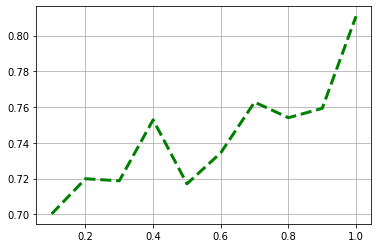

In [41]:
#6.2 学习曲线
params = np.arange(0.1, 1.1, 0.1)
_, train_scores, test_scores = ms.learning_curve(model, x, y, train_sizes = params, cv = 5)
test_s = pd.Series(test_scores.mean(axis = 1), index = params)
test_s.plot(linestyle = '--', grid = 'on', color = 'green', linewidth = 3)

In [34]:
#7.1 训练模型
model.fit(x, y)
pred_y = model.predict(x)

In [35]:
#7.2 测试模型
data = [['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
        ['high', 'high', '4', '4', 'med', 'med', 'acc'],
        ['low', 'low', '2', '4', 'small', 'high', 'good'],
        ['low', 'med', '3', '4', 'med', 'high', 'vgood']]
test_data = pd.DataFrame(data)
for k,v in test_data.items():
    lbe = lbes[k]# 注意这里是用上面的标签编码器
    test_data[k] = lbe.transform(v) #这里不能用fit_transform，因为上面已经fit完了
test_x, test_y = test_data.loc[:, :5], test_data[6]
pred_test_y = model.predict(test_x)
print('预测值：', lbes[6].inverse_transform(pred_test_y)) #反转编码，标签编码器自带的
print('实际值：', lbes[6].inverse_transform(test_y.values))

预测值： ['unacc' 'acc' 'good' 'vgood']
实际值： ['unacc' 'acc' 'good' 'vgood']


In [36]:
#8. 模型评估、混淆矩阵、分类报告
#8.1 混淆矩阵
import sklearn.metrics as sm
array_confusion = sm.confusion_matrix(y, pred_y)
array_confusion

array([[ 383,    0,    0,    1],
       [  14,   52,    0,    3],
       [   3,    0, 1207,    0],
       [   0,    0,    0,   65]], dtype=int64)

In [37]:
#8.2 分类报告
cr= sm.classification_report(y, pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       384
           1       1.00      0.75      0.86        69
           2       1.00      1.00      1.00      1210
           3       0.94      1.00      0.97        65

    accuracy                           0.99      1728
   macro avg       0.97      0.94      0.95      1728
weighted avg       0.99      0.99      0.99      1728

